# Churn Prediction Project

## Introduction

Customer churn, also known as customer attrition, is the loss of clients or customers. It is a critical metric for businesses as it directly impacts revenue. Predicting customer churn allows businesses to take proactive measures to retain customers and improve customer satisfaction.

In this project, we will build a machine learning model to predict customer churn. We will use a dataset containing customer information and their churn status. The steps involved in this project include:

1. Data Exploration
2. Feature Engineering
3. Model Building
4. Model Evaluation
5. Conclusion and Insights

Lets get started!

## 1. Data Exploration

In [1]:
### Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
sns.set_palette("pastel")


In [2]:
os.chdir('..')

In [3]:
df = pd.read_csv('Data/churn_data.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()
#Something is wrong with TotalCharges column, it should be numeric but it is object. I also cannot convert it with
#astype(float). I saw that there are some empty strings in the column, I will replace them with NaN and then convert

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#Total charges are objects???
df[df['TotalCharges']==' ']

df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df.describe()
# in total charges mean is higher than median, which means there are outliers in the data. We will handle them later.
# Rest of numeric values seems fine.
# Senior citizen is categorical

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(unique_values)
    print("\n")



Column: customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']


Column: gender
['Female' 'Male']


Column: SeniorCitizen
[0 1]


Column: Partner
['Yes' 'No']


Column: Dependents
['No' 'Yes']


Column: tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]


Column: PhoneService
['No' 'Yes']


Column: MultipleLines
['No phone service' 'No' 'Yes']


Column: InternetService
['DSL' 'Fiber optic' 'No']


Column: OnlineSecurity
['No' 'Yes' 'No internet service']


Column: OnlineBackup
['Yes' 'No' 'No internet service']


Column: DeviceProtection
['No' 'Yes' 'No internet service']


Column: TechSupport
['No' 'Yes' 'No internet service']


Column: StreamingTV
['No' 'Yes' 'No internet service']


Column: StreamingMovies
['No' 'Yes' 'No internet service']


Column: Contract
['Mont

In [11]:
#I think that column customerID is not necessary for the analysis, I will drop it.

df.drop('customerID', axis=1, inplace=True)

## 1.1 Data Visualization

In this section, we will visualize the data to gain insights and understand the relationships between different features. We will use various plots such as histograms, bar plots, and box plots to explore the data.

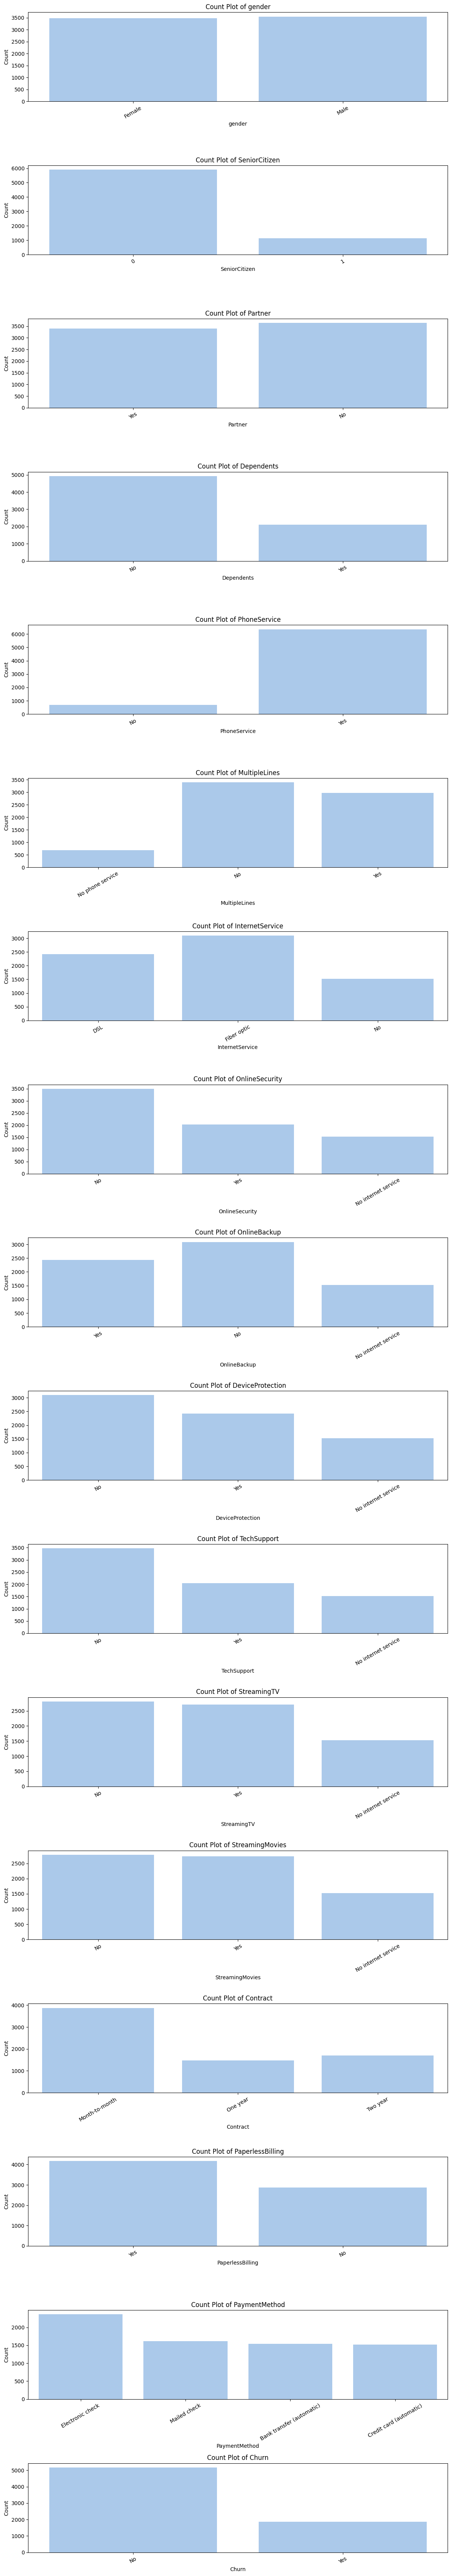

In [12]:


# Select categorical columns with at most 5 unique values
categorical_cols = [col for col in df.columns if df[col].nunique() <= 5]

# Create count plots for each selected column
plt.figure(figsize=(12, len(categorical_cols) * 4))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    sns.countplot(data=df, x=col)
    plt.title(f"Count Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=30)  # Rotate labels for better readability

plt.tight_layout()
plt.show()

#We can see that we have imbalanced data in the target column. We will handle it later.
#In other features, we also have imbalanced data, but I think it is not that bad and should not be problem.



Text(0.5, 1.0, 'Correlation Matrix of Numerical Features')

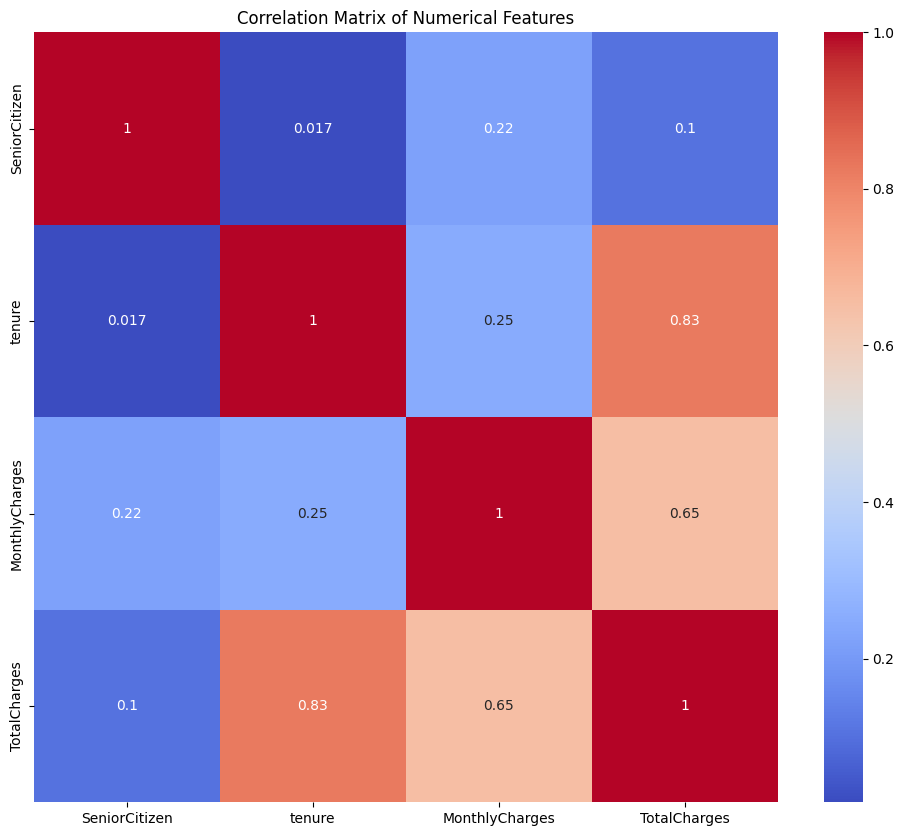

In [13]:
plt.figure(figsize=(12, 10))

# Create heatmap to visualize the correlation between numerical features
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

corr_matrix = df[numeric_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Features")
#There is strong correlation between TotalCharges and tenure (0.83), MonthlyCharges and TotalCharges (0.65).
# However, there is weak correlation between SeniorCitizen and tenure (0.017)
    

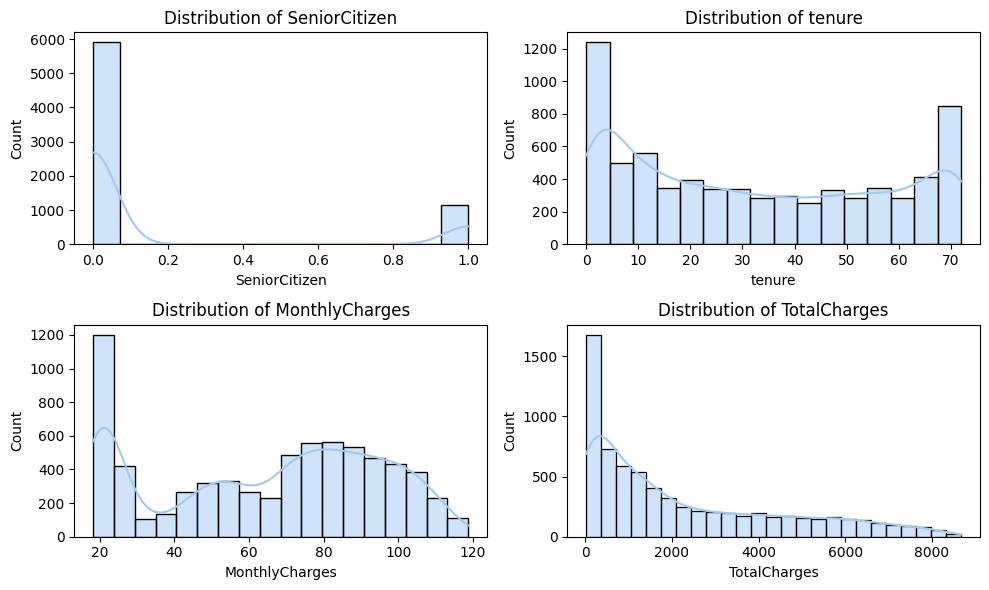

In [14]:
#For the general case we will change the target column to 0 and 1
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Create a histogram for each numeric column
plt.figure(figsize=(10, 6))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()

#Total charges is right-skewed.
#Tenures are or very low values or very high values.
#Distribution of Monthly charges is bimodal

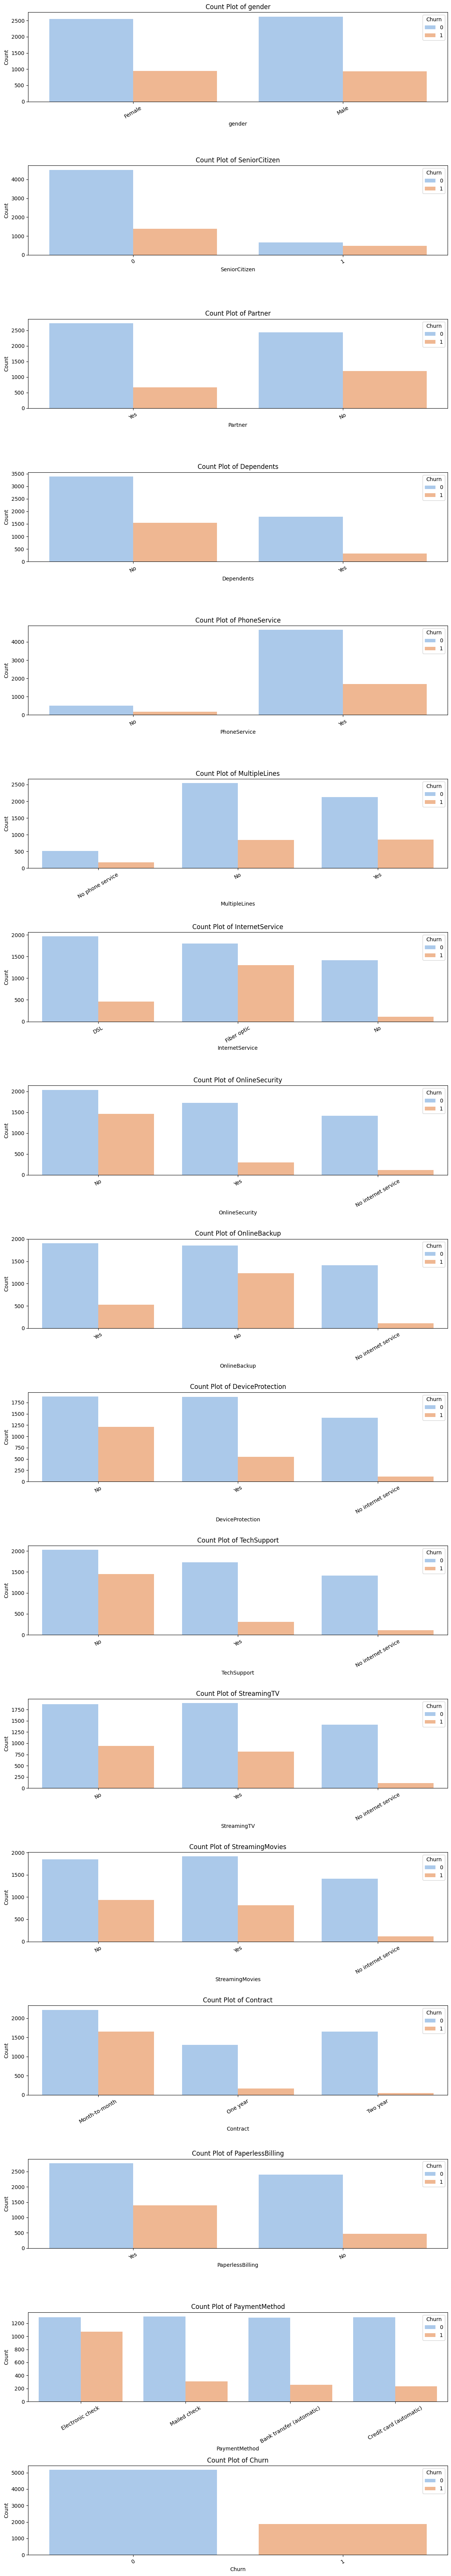

In [15]:
# Select categorical columns with at most 5 unique values
categorical_cols = [col for col in df.columns if df[col].nunique() <= 5]

# Create count plots for each selected column
plt.figure(figsize=(12, len(categorical_cols) * 4))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    sns.countplot(data=df, x=col,hue='Churn')
    plt.title(f"Count Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=30)  # Rotate labels for better readability

plt.tight_layout()
plt.show()

#Conclusion:
#1. Senior citizens are more likely to churn.
#2. Customers with month-to-month contract are more likely to churn.
#3. Customers with electronic check payment method are more likely to churn.



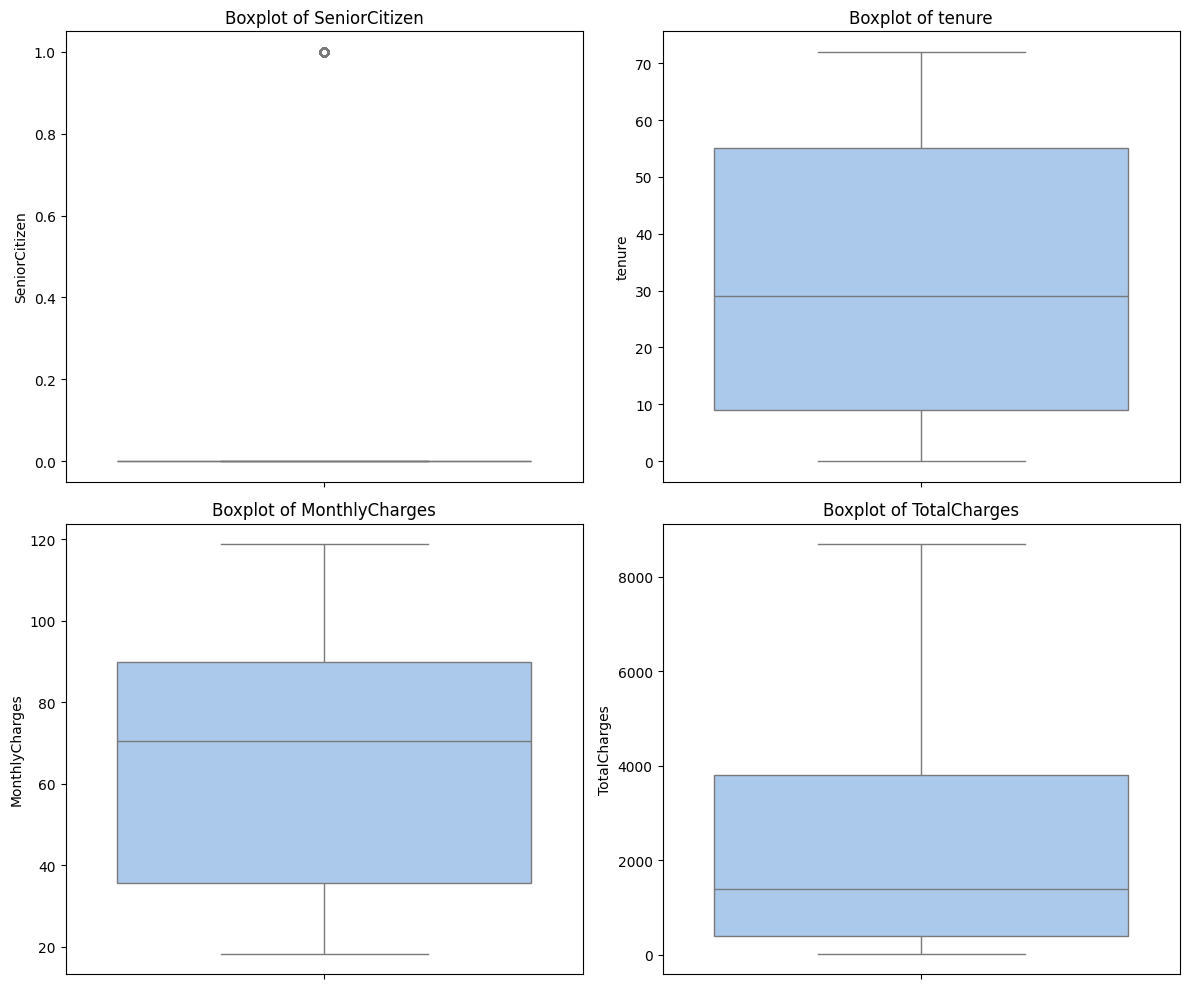

In [16]:
#Boxplot for numerical columns
plt.figure(figsize=(12, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, y=col)
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
#There are not outliers in the dataset.

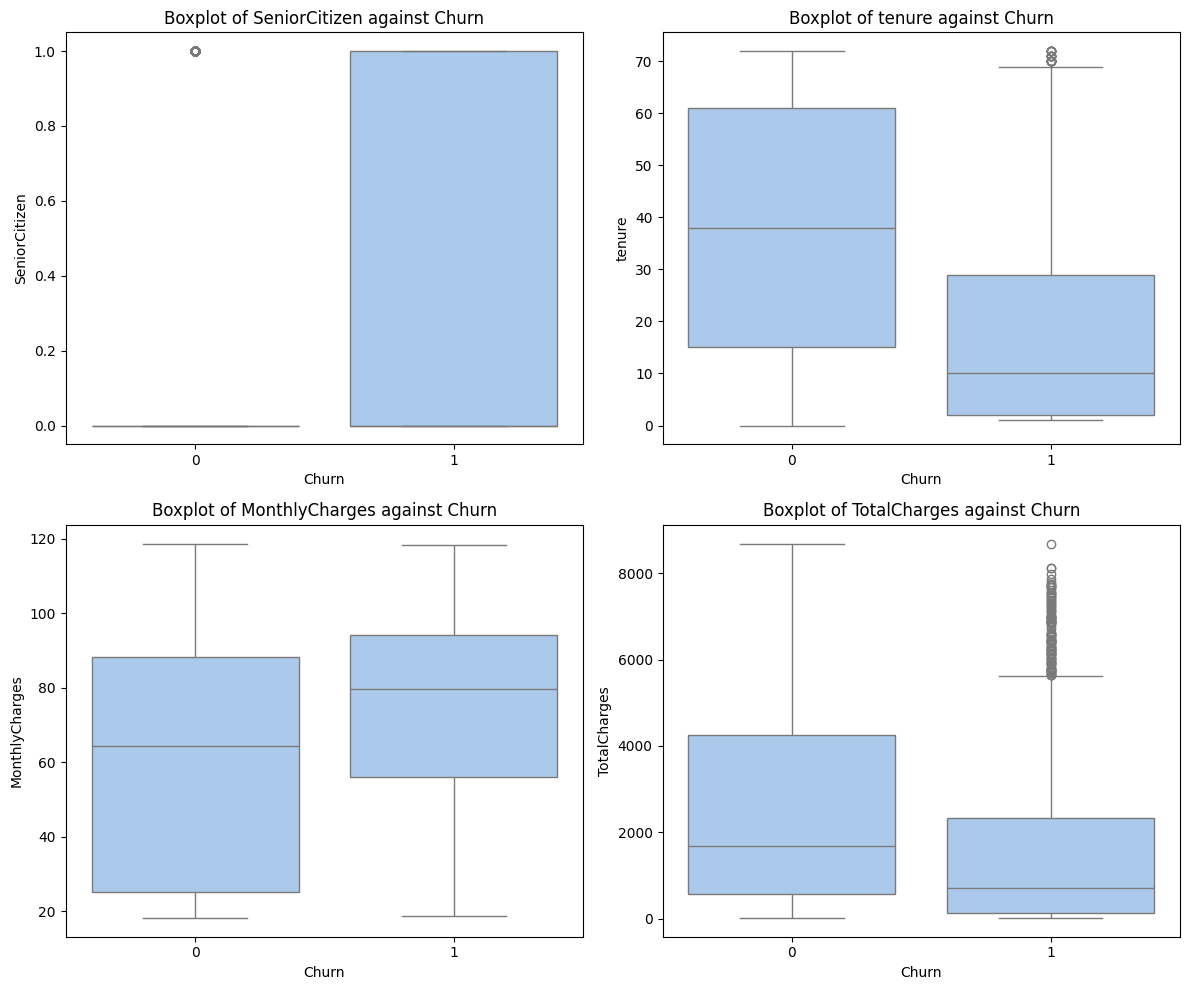

In [17]:
# Boxplot of numerical features
plt.figure(figsize=(12, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, y=col, x='Churn')
    plt.title(f"Boxplot of {col} against Churn")
    plt.xlabel("Churn")
    plt.ylabel(col)

plt.tight_layout()

#Conclusion:
#1. Customers with higher tenure are less likely to churn.



## 2. Feature Engineering

In this section, we will create new features and transform existing ones to improve the performance of our machine learning models. Feature engineering is a crucial step in the data preprocessing pipeline as it can significantly impact the model's ability to learn and generalize from the data.

### 2.1 Handling Missing Values

We will start by handling missing values in the dataset. Missing values can negatively affect the performance of machine learning models, so it's important to address them appropriately.

### 2.2 Encoding Categorical Variables

Next, we will encode categorical variables into numerical values. Many machine learning algorithms require numerical input, so we need to convert categorical features into a suitable format.

### 2.3 Feature Scaling

We will also scale the numerical features to ensure that they are on a similar scale. This can help improve the performance of certain machine learning algorithms.

### 2.4 Balancing the Dataset

We will handle the imbalance in the target column by using techniques such as SMOTE. SMOTE creates synthetic samples of the minority class by interpolating between existing samples. This helps to balance the dataset and improve the performance of machine learning algorithms.



# 2.1 Handling Missing Values

In [18]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [19]:
# Handling missing values in TotalCharges column

# Fill missing values with the median of TotalCharges, because of the outliers
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


C:\Users\kuban\AppData\Local\Temp\ipykernel_3960\683713768.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [20]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# 2.2 Encoding Categorical Variables

In [21]:
#gender,partner,dependents,phoneService, paperlessBilling columns are binary, so we can use LabelEncoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']:
    df[col] = le.fit_transform(df[col])

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [22]:
df.shape

(7043, 20)

In [23]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [24]:
# Rest of categorical columns has more than 2 unique values, so we will use one-hot encoding
df = pd.get_dummies(df, columns=['PaymentMethod','Contract','StreamingMovies','StreamingTV','TechSupport','OnlineSecurity','OnlineBackup','DeviceProtection','MultipleLines','InternetService'], drop_first=True,dtype=int)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No internet service,TechSupport_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,1,0,0,0,2,1,1,53.85,108.15,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# 2.3 Feature Scaling


In [25]:
# We will use StandardScaler to scale the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No internet service,TechSupport_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,-1.277445,0,1,-1.160323,-0.994242,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,1,0,0,0,0.066327,1,0,-0.259629,-0.173244,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,1,0,0,0,-1.236724,1,1,-0.362660,-0.959674,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
3,1,0,0,0,0.514251,0,0,-0.746535,-0.194766,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0
4,0,0,0,0,-1.236724,1,1,0.197365,-0.940470,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# 2.4 Balancing the Dataset

In [30]:
#Balancing the data using SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X = df.drop('Churn', axis=1)
y = df['Churn']

X_resampled, y_resampled = smote.fit_resample(X, y)

X_resampled.shape, y_resampled.shape

((10348, 30), (10348,))

## 3. Model Building

In this section, we will build and train a machine learning model to predict customer churn. We will follow these steps:

1. Split the data into training and testing sets.
2. Train a machine learning model using the training data.
3. Evaluate the model's performance on the testing data.

### 3.1 Splitting the Data

We will start by splitting the data into training and testing sets. This will allow us to train the model on one portion of the data and evaluate its performance on another portion.

### 3.2 Training the Model

Next, we will train a machine learning model using the training data.

### 3.3 Evaluating the Model

Finally, we will evaluate the model's performance on the testing data. We will use metrics such as accuracy, precision, recall, and the F1 score to assess the model's performance.

# 3.1 Splitting the Data

In [31]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 3.2 Training the Model

In [32]:
#necessary libraries for the models
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve,f1_score,recall_score
from sklearn.model_selection import RandomizedSearchCV,StratifiedKFold
import warnings





In [33]:
def compare_models_with_gridsearch(models_with_params, X_train, X_test, y_train, y_test, metric=recall_score):
    """
    Porównuje modele z RandomizedSearchCV na tych samych danych i zwraca najlepszy model z wynikami.
    
    Args:
    - models_with_params (list): Lista krotek (nazwa_modelu, instancja_modelu, parametry).
    - X_train, X_test (array): Dane treningowe i testowe (cechy).
    - y_train, y_test (array): Dane treningowe i testowe (etykiety).
    - metric (function): Funkcja oceny modelu (domyślnie accuracy_score).
    
    Returns:
    - best_model_name (str): Nazwa najlepszego modelu.
    - best_model (object): Instancja najlepszego modelu z optymalnymi hiperparametrami.
    - results (dict): Wyniki najlepszych modeli po RandomizedSearchCV.
    """
    results = {}
    best_model_name = None
    best_model = None
    best_score = float('-inf')
    cv = StratifiedKFold(3)
    
    for name, model, params in models_with_params:
        print(f"Trenuję model: {name}")
        # GridSearchCV
        grid = RandomizedSearchCV(estimator=model, param_distributions=params, scoring='f1', cv=cv, n_jobs=-1)
        grid.fit(X_train, y_train)
        
        # Przewidywanie na zbiorze testowym
        y_pred = grid.best_estimator_.predict(X_test)
        score = metric(y_test, y_pred)
        results[name] = {"Best Params": grid.best_params_, "\nScore": score}
        print('--------------------------------------------')
        print(classification_report(y_pred,y_test))
        print('--------------------------------------------')
        
        # Zaktualizuj najlepszego modela
        if score > best_score:
            best_score = score
            best_model_name = name
            best_model = grid.best_estimator_
    
    return best_model_name, best_model, results

In [34]:
#Decision tree params
criterion = ['gini', 'entropy', 'log_loss']
max_depth = [3,5,9,15,20]
max_features = ['sqrt','log2']

#Random Forest params
n_estimators = [50,100,200]





penalty = ['l1', 'l2', 'elasticnet',None]
C = [0.01,0.1,1,0.0001,10]
class_weight = ['balanced',None]
solver = [ 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
gamma = ['scale','auto']


#catboost_params
learning_rate = [0.001,0.01,0.1]

#xgb_params
sampling_method = ['uniform','gradient_based']
lma = [1,2,0.1,1.1]


#gbclassifier
loss = ['log_loss', 'exponential']


params_svc = dict(C=C,kernel=kernel,class_weight=class_weight,gamma=gamma)
params_lr = dict(penalty=penalty,C=C,class_weight=class_weight,solver=solver)
params_dt = dict(criterion=criterion,max_depth=max_depth,max_features=max_features)
params_rf = dict(criterion=criterion,max_depth=max_depth,max_features=max_features,n_estimators=n_estimators)
params_xgb = dict(max_depth=max_depth,reg_lambda = lma,sampling_method=sampling_method)
params_ada = dict(n_estimators=n_estimators,learning_rate=learning_rate)
params_gbst = dict(loss=loss,learning_rate=learning_rate,n_estimators=n_estimators,max_depth=max_depth)




models = [['LogisticRegression',LogisticRegression(),params_lr],
          ['SVMclassifier',SVC(),params_svc],
          ['DecisionTreeClassifier',DecisionTreeClassifier(),params_dt],
          ['RandomForestClaasifier',RandomForestClassifier(),params_rf],
          ['XGBoostClassifier',XGBClassifier(),params_xgb],
          ['AdaBoostClassifier',AdaBoostClassifier(),params_ada],
          ['GradientBoostingClassifier',GradientBoostingClassifier(),params_gbst]
          ]

name,model, results = compare_models_with_gridsearch(models,X_train,X_test,y_train,y_test)

print(name)
print(model)
print(results)

Trenuję model: LogisticRegression


c:\Users\kuban\Documents\MLProject-2\venv\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
12 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\kuban\Documents\MLProject-2\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\kuban\Documents\MLProject-2\venv\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\kuban\Documents\MLProject-2\venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in f

--------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.84      0.80       948
           1       0.85      0.80      0.82      1122

    accuracy                           0.81      2070
   macro avg       0.81      0.82      0.81      2070
weighted avg       0.82      0.81      0.81      2070

--------------------------------------------
Trenuję model: SVMclassifier
--------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       890
           1       0.89      0.79      0.84      1180

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.84      0.83      0.83      2070

--------------------------------------------
Trenuję model: DecisionTreeClassifier
--------------------------------------------
              precision    recall  f1-score   support


c:\Users\kuban\Documents\MLProject-2\venv\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\kuban\Documents\MLProject-2\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\kuban\Documents\MLProject-2\venv\lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
  File "c:\Users\kuban\Documents\MLProject-2\venv\lib\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
  File "c

--------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       990
           1       0.86      0.84      0.85      1080

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070

--------------------------------------------
Trenuję model: AdaBoostClassifier


c:\Users\kuban\Documents\MLProject-2\venv\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


--------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.84      0.77       858
           1       0.87      0.75      0.81      1212

    accuracy                           0.79      2070
   macro avg       0.79      0.80      0.79      2070
weighted avg       0.80      0.79      0.79      2070

--------------------------------------------
Trenuję model: GradientBoostingClassifier
--------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       979
           1       0.87      0.83      0.85      1091

    accuracy                           0.84      2070
   macro avg       0.84      0.85      0.84      2070
weighted avg       0.85      0.84      0.84      2070

--------------------------------------------
RandomForestClaasifier
RandomForestClassifier(criterion='entropy', max_depth=15)
{'LogisticRegression': {'Best Params': {'so

In [ ]:
# We are using recall as the metric for evaluating the model.
# It is important to correctly identify customers who are likely to churn.


y_pred= model.predict(X_test)
f1_score(y_test,y_pred)

0.8614540466392319

In [36]:
recall_score(y_test,y_pred)

0.897998093422307

In [38]:
dummy_model_prob = [0 for _ in range(len(y_test))]
model_prob = model.predict_proba(X_test)
model_prob = model_prob[:,1]

In [39]:
dummy_model_auc = roc_auc_score(y_test,dummy_model_prob)
model_auc = roc_auc_score(y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.9246575022711803


In [40]:
dummy_fpr,dummy_tpr,_ = roc_curve(y_test,dummy_model_prob)
model_fpr,model_tpr,thresholds = roc_curve(y_test,model_prob)

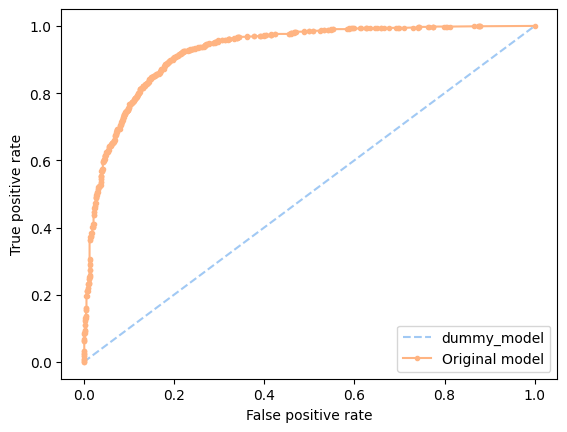

In [41]:
plt.plot(dummy_fpr,dummy_tpr,linestyle = '--',label='dummy_model')
plt.plot(model_fpr,model_tpr,marker='.',label='Original model')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

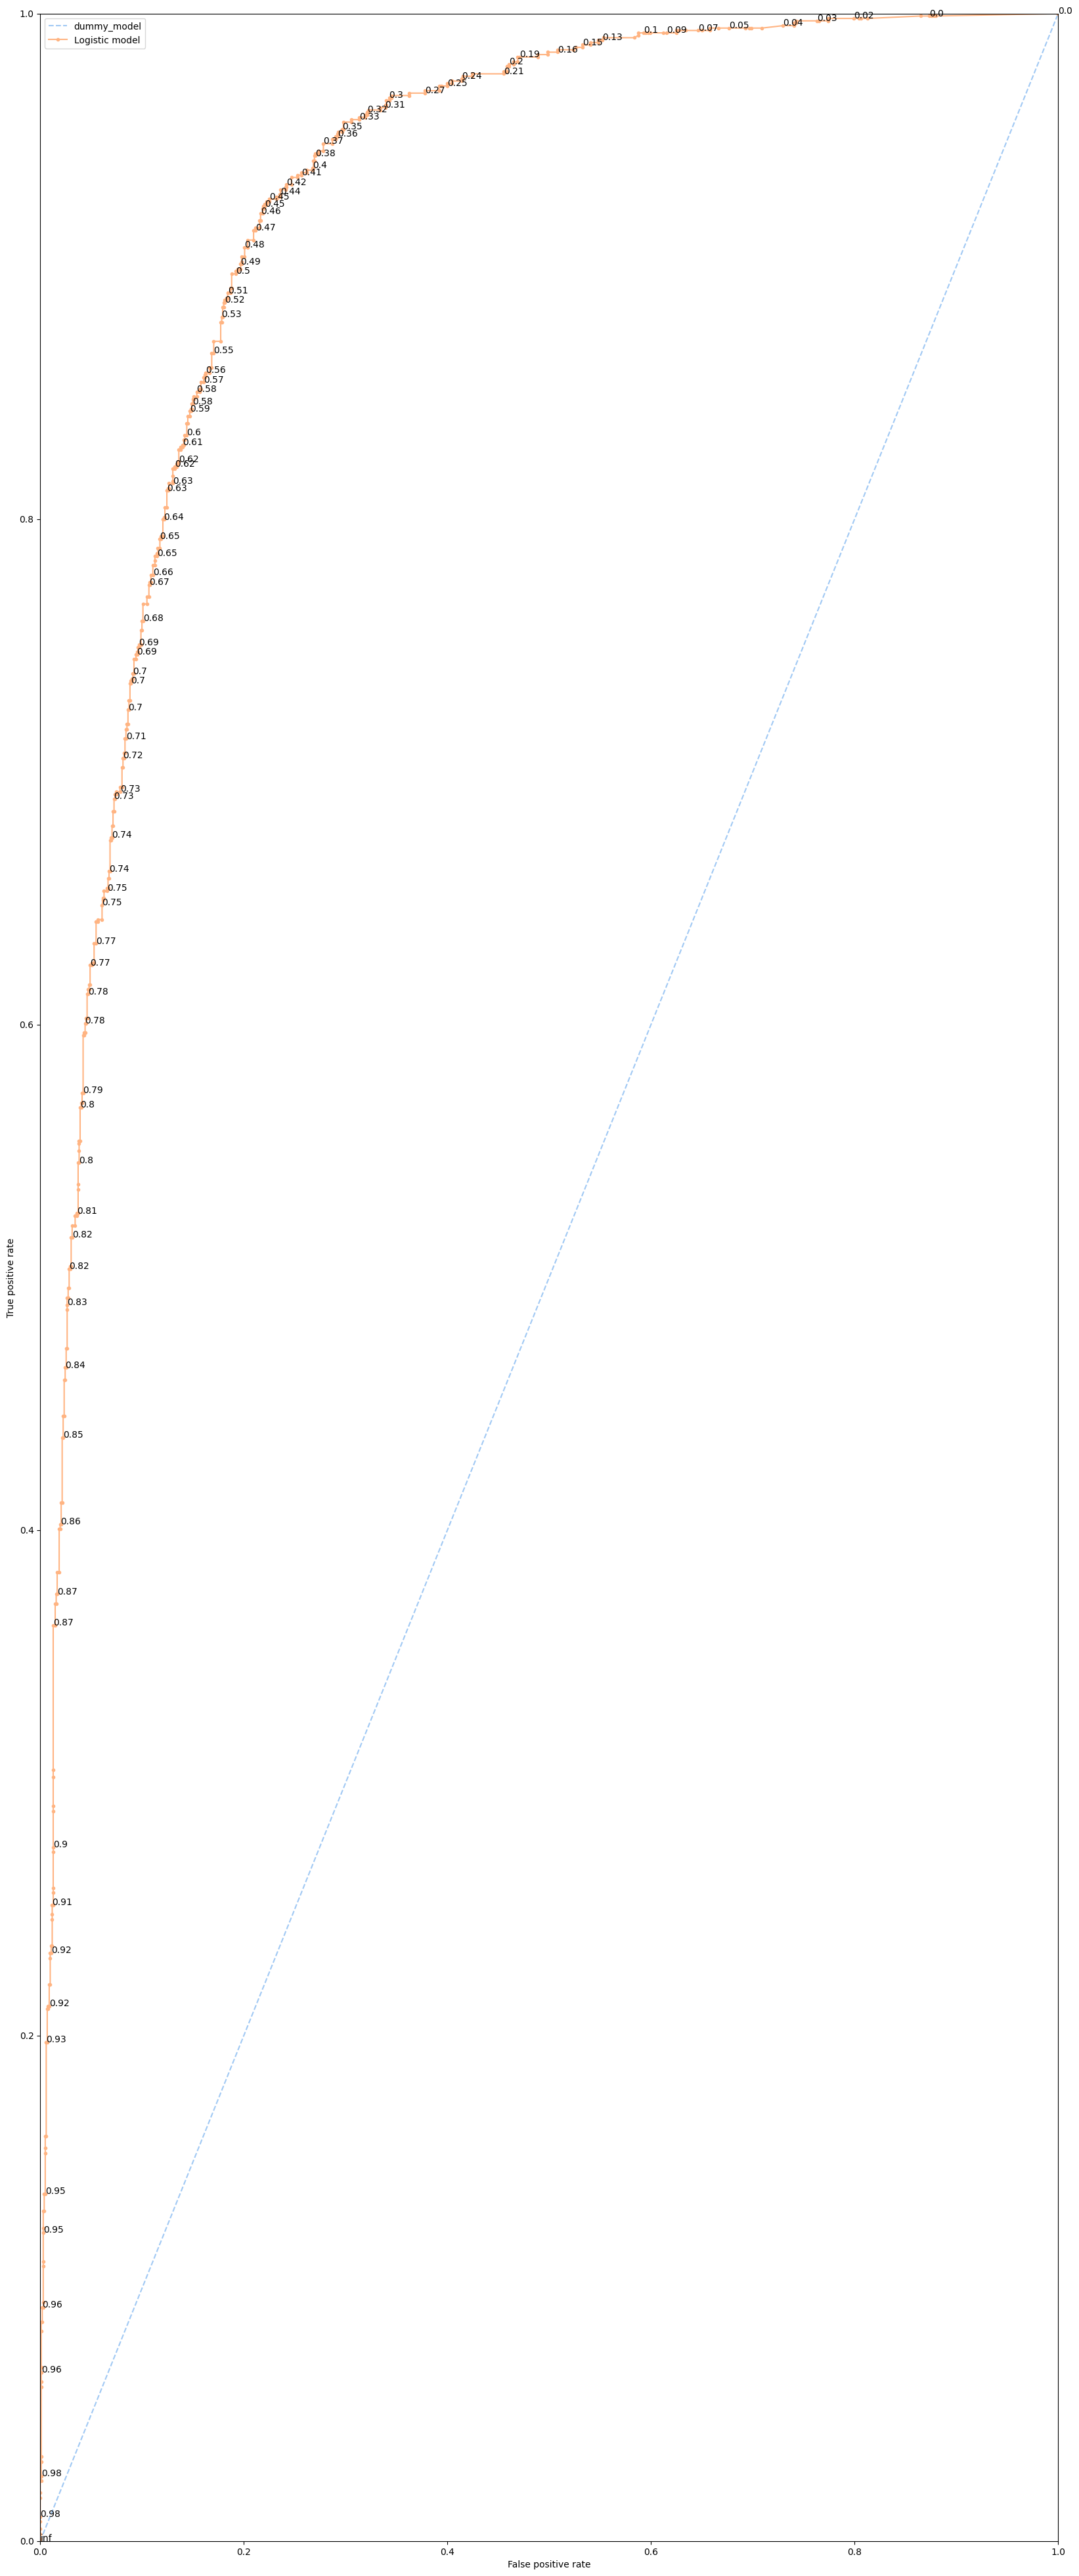

In [42]:
fig = plt.figure(figsize=(20,50))
ax = fig.add_subplot(111)
plt.plot(dummy_fpr,dummy_tpr,linestyle = '--',label='dummy_model')
plt.plot(model_fpr,model_tpr,marker='.',label='Logistic model')

for i, xyz in enumerate(zip(model_fpr, model_tpr, thresholds)):
    if i % 5 == 0:  # Co 5 punkt
        ax.annotate('%s' % np.round(xyz[2], 2), xy=(xyz[0], xyz[1]))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

In [ ]:
probas = model.predict_proba(X_test)[:, 1]  # Prawdopodobieństwo klasy 1

# Zmieniamy próg, np. na 0.45
threshold = 0.45
predictions = (probas >= threshold).astype(int)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1021
           1       0.81      0.92      0.86      1049

    accuracy                           0.85      2070
   macro avg       0.86      0.85      0.85      2070
weighted avg       0.86      0.85      0.85      2070

